In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\Leher\Desktop\IT специальность\зсд\superset.csv", sep=';')

In [12]:
print(data.columns)

Index(['Date2022', 'Value2022', 'Date2023', 'Value2023'], dtype='object')


In [13]:
data['Date2022'] = pd.to_datetime(data['Date2022'])
data['Date2023'] = pd.to_datetime(data['Date2023'])

# Группировка данных по неделям
data['Week2022'] = data['Date2022'].dt.isocalendar().week
data['Week2023'] = data['Date2023'].dt.isocalendar().week

# Шаг 4: Агрегирование данных по неделям
weekly_revenue_2022 = data.groupby('Week2022')['Value2022'].sum()
weekly_revenue_2023 = data.groupby('Week2023')['Value2023'].sum()

In [14]:
print(data.dtypes)

Date2022     datetime64[ns]
Value2022             int64
Date2023     datetime64[ns]
Value2023             int64
Week2022             UInt32
Week2023             UInt32
dtype: object


In [15]:
# Убедимся, что индексы являются числовыми
weekly_revenue_2022.index = weekly_revenue_2022.index.map(int)
weekly_revenue_2023.index = weekly_revenue_2023.index.map(int)


print(data.dtypes)

Date2022     datetime64[ns]
Value2022             int64
Date2023     datetime64[ns]
Value2023             int64
Week2022             UInt32
Week2023             UInt32
dtype: object


In [16]:
weekly_revenue_2022 = weekly_revenue_2022.reset_index()
weekly_revenue_2023 = weekly_revenue_2023.reset_index()
print(data.dtypes)

Date2022     datetime64[ns]
Value2022             int64
Date2023     datetime64[ns]
Value2023             int64
Week2022             UInt32
Week2023             UInt32
dtype: object


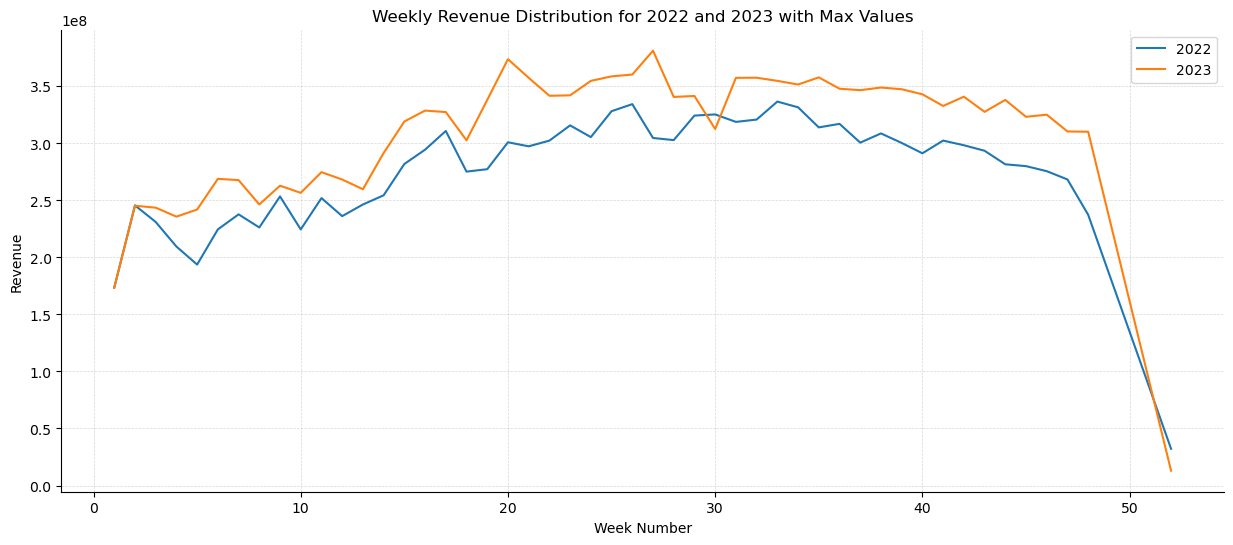

In [18]:
plt.figure(figsize=(15, 6))
ax = plt.gca()

# Отрисовка графиков для 2022 и 2023 годов
plt.plot(weekly_revenue_2022['Week2022'], weekly_revenue_2022['Value2022'], label='2022')
plt.plot(weekly_revenue_2023['Week2023'], weekly_revenue_2023['Value2023'], label='2023')


plt.title('Weekly Revenue Distribution for 2022 and 2023 with Max Values')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5) # Тонкая пунктирная сетка с прозрачностью
plt.xlabel('Week Number')
plt.ylabel('Revenue')
# убираем верхнюю и правую грани у графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()